<a href="https://colab.research.google.com/github/vaibhav7766/NLP_lab/blob/main/Assignment%202/assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center">Assignment 2</h1>

Name: Vaibhav Sharma  
Batch: 2022-26  
Branch: AIML B2  
PRN: 22070126125  
[GitHub Link](https://github.com/vaibhav7766/NLP_lab)

In [ ]:
import re
import pandas as pd

from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Embedding,
    Conv1D,
    MaxPooling1D,
    LSTM,
    Dense,
    Dropout,
)
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_data = pd.read_csv("train.csv", header=0, names=["ID", "Title", "Desc"])
test_data = pd.read_csv("test.csv", header=0, names=["ID", "Title", "Desc"])

In [ ]:
print(train_data.shape)
print(test_data.shape)

(120000, 3)
(7600, 3)


In [ ]:
X_train = train_data.Desc
X_test = test_data.Desc
y_train = train_data.ID
y_test = test_data.ID

In [ ]:
def remove_html_tag(text):
    html = re.compile("<.*?")
    cleaned_text = html.sub("", text)
    return cleaned_text


X_train = X_train.apply(remove_html_tag)
X_test = X_test.apply(remove_html_tag)

In [ ]:
def url_remove(text):
    url = re.compile(r"https?://\S+|www\.\S+")
    return url.sub(r"", text)


X_train = X_train.apply(url_remove)
X_test = X_test.apply(url_remove)

In [ ]:
def word_tokenize(text):
    token = re.findall("[\w']+", text)
    return token


X_train = X_train.apply(word_tokenize)
X_test = X_test.apply(word_tokenize)

<>:2: SyntaxWarning: invalid escape sequence '\w'
<>:2: SyntaxWarning: invalid escape sequence '\w'
C:\Users\vaibh\AppData\Local\Temp\ipykernel_5320\1805052451.py:2: SyntaxWarning: invalid escape sequence '\w'
  token = re.findall("[\w']+", text)


In [ ]:
X_train = X_train.apply(lambda x: [word.lower() for word in x])
X_test = X_test.apply(lambda x: [word.lower() for word in x])

In [ ]:
def remove_stopwords(lst):
    stop_words = set(stopwords.words("english"))
    return [word for word in lst if word.lower() not in stop_words]


X_train = X_train.apply(remove_stopwords)
X_test = X_test.apply(remove_stopwords)

In [ ]:
import string


def remove_punctuations(lst):
    return [
        "".join(char for char in word if char not in string.punctuation) for word in lst
    ]


X_train = X_train.apply(remove_punctuations)
X_test = X_test.apply(remove_punctuations)

In [ ]:
def remove_number(lst):
    return [
        "".join(char for char in word if char not in string.digits)
        for word in lst
        if word
    ]


X_train = X_train.apply(remove_number)
X_test = X_test.apply(remove_number)

In [ ]:
from nltk.stem import PorterStemmer


def stemming(text):
    porter_stemmer = PorterStemmer()
    return [porter_stemmer.stem(word) for word in text]


X_train = X_train.apply(stemming)
X_test = X_test.apply(stemming)

In [ ]:
def remove_extra_words(word_list):
    stopwords = ["href", "lt", "gt", "ii", "iii", "ie", "quot", "com"]
    cleaned_list = []
    for word in word_list:
        if word not in stopwords:
            cleaned_list.append(word)
    return cleaned_list


X_train = X_train.apply(remove_extra_words)
X_test = X_test.apply(remove_extra_words)

In [ ]:
# Encode labels
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [ ]:
max_len = 200  # max_sequence_length from dataset

In [ ]:
# 1st Set of Results
max_words_1 = 10000
embedding_dim_1 = 10
lstm_units_1 = 8

In [ ]:
# 2nd Set of Results
max_words_2 = 25000
embedding_dim_2 = 30
lstm_units_2 = 16

In [ ]:
# Tokenizer for 1st set
tokenizer_1 = Tokenizer(num_words=max_words_1)
tokenizer_1.fit_on_texts(X_train)

X_train_1 = tokenizer_1.texts_to_sequences(X_train)
X_test_1 = tokenizer_1.texts_to_sequences(X_test)

X_train_1 = pad_sequences(X_train_1, maxlen=max_len)
X_test_1 = pad_sequences(X_test_1, maxlen=max_len)

In [ ]:
tokenizer_2 = Tokenizer(num_words=max_words_2)
tokenizer_2.fit_on_texts(X_train)

X_train_2 = tokenizer_2.texts_to_sequences(X_train)
X_test_2 = tokenizer_2.texts_to_sequences(X_test)

X_train_2 = pad_sequences(X_train_2, maxlen=max_len)
X_test_2 = pad_sequences(X_test_2, maxlen=max_len)

In [ ]:
# Define the model for 1st set of results
model_1 = Sequential(
    [
        Embedding(len(tokenizer_1.word_index) + 1, embedding_dim_1),
        Conv1D(128, 5, activation="relu", kernel_regularizer=l2(0.001)),
        MaxPooling1D(5),
        LSTM(lstm_units_1),
        Dense(128, activation="relu"),
        Dropout(0.5),
        Dense(4, activation="softmax"),
    ]
)

In [ ]:
# Define the model for 2nd set of results
model_2 = Sequential(
    [
        Embedding(len(tokenizer_2.word_index) + 1, embedding_dim_2),
        Conv1D(128, 5, activation="relu", kernel_regularizer=l2(0.001)),
        MaxPooling1D(5),
        LSTM(lstm_units_2, return_sequences=True),
        LSTM(lstm_units_2),
        Dense(128, activation="relu"),
        Dropout(0.5),
        Dense(4, activation="softmax"),
    ]
)

In [ ]:
optim = Adam(learning_rate=0.0001)

model_1.compile(
    optimizer=optim, loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)
model_2.compile(
    optimizer=optim, loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

In [ ]:
history_1 = model_1.fit(
    X_train_1, y_train, epochs=5, batch_size=4, validation_split=0.1, verbose=1
)

Epoch 1/5
27000/27000 ━━━━━━━━━━━━━━━━━━━━ 159s 6ms/step - accuracy: 0.7637 - loss: 0.6627 - val_accuracy: 0.8691 - val_loss: 0.3890
Epoch 2/5
27000/27000 ━━━━━━━━━━━━━━━━━━━━ 176s 7ms/step - accuracy: 0.8925 - loss: 0.3636 - val_accuracy: 0.8867 - val_loss: 0.3380
Epoch 3/5
27000/27000 ━━━━━━━━━━━━━━━━━━━━ 162s 6ms/step - accuracy: 0.9097 - loss: 0.2991 - val_accuracy: 0.8954 - val_loss: 0.3071
Epoch 4/5
27000/27000 ━━━━━━━━━━━━━━━━━━━━ 168s 6ms/step - accuracy: 0.9195 - loss: 0.2637 - val_accuracy: 0.8959 - val_loss: 0.3039
Epoch 5/5
27000/27000 ━━━━━━━━━━━━━━━━━━━━ 157s 6ms/step - accuracy: 0.9232 - loss: 0.2448 - val_accuracy: 0.9003 - val_loss: 0.2957


In [ ]:
history_2 = model_2.fit(
    X_train_2, y_train, epochs=5, batch_size=4, validation_split=0.1, verbose=1
)

Epoch 1/5
27000/27000 ━━━━━━━━━━━━━━━━━━━━ 338s 12ms/step - accuracy: 0.6385 - loss: 0.8362 - val_accuracy: 0.8777 - val_loss: 0.3593
Epoch 2/5
27000/27000 ━━━━━━━━━━━━━━━━━━━━ 350s 13ms/step - accuracy: 0.8980 - loss: 0.3336 - val_accuracy: 0.8913 - val_loss: 0.3224
Epoch 3/5
27000/27000 ━━━━━━━━━━━━━━━━━━━━ 345s 13ms/step - accuracy: 0.9115 - loss: 0.2886 - val_accuracy: 0.8913 - val_loss: 0.3246
Epoch 4/5
27000/27000 ━━━━━━━━━━━━━━━━━━━━ 352s 13ms/step - accuracy: 0.9201 - loss: 0.2594 - val_accuracy: 0.8958 - val_loss: 0.3100
Epoch 5/5
27000/27000 ━━━━━━━━━━━━━━━━━━━━ 303s 11ms/step - accuracy: 0.9303 - loss: 0.2280 - val_accuracy: 0.8937 - val_loss: 0.3141


In [ ]:
# Evaluate the models
loss_1, accuracy_1 = model_1.evaluate(X_test_1, y_test, verbose=0)
loss_2, accuracy_2 = model_2.evaluate(X_test_2, y_test, verbose=0)

In [ ]:
print(f"Test accuracy for 1st model: {accuracy_1:.4f}")
print(f"Test accuracy for 2nd model: {accuracy_2:.4f}")

Test accuracy for 1st model: 0.9020
Test accuracy for 2nd model: 0.9012


In [ ]:
print(classification_report(y_test, model_1.predict(X_test_1).argmax(axis=1)))
print(classification_report(y_test, model_2.predict(X_test_2).argmax(axis=1)))

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.92      0.89      0.91      1900
           1       0.94      0.97      0.96      1900
           2       0.87      0.87      0.87      1900
           3       0.87      0.88      0.88      1900

    accuracy                           0.90      7600
   macro avg       0.90      0.90      0.90      7600
weighted avg       0.90      0.90      0.90      7600

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0       0.95      0.87      0.91      1900
           1       0.95      0.97      0.96      1900
           2       0.85      0.89      0.87      1900
           3       0.86      0.88      0.87      1900

    accuracy                           0.90      7600
   macro avg       0.90      0.90      0.90      7600
weighted avg       0.90      0.90      0.90      7600



In [ ]:
print(confusion_matrix(y_test, model_1.predict(X_test_1).argmax(axis=1)))
print(confusion_matrix(y_test, model_2.predict(X_test_2).argmax(axis=1)))

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[1693   63   84   60]
 [  16 1850   18   16]
 [  61   29 1647  163]
 [  61   21  153 1665]]
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[[1655   70  100   75]
 [  20 1841   10   29]
 [  38   16 1686  160]
 [  34   20  179 1667]]


238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


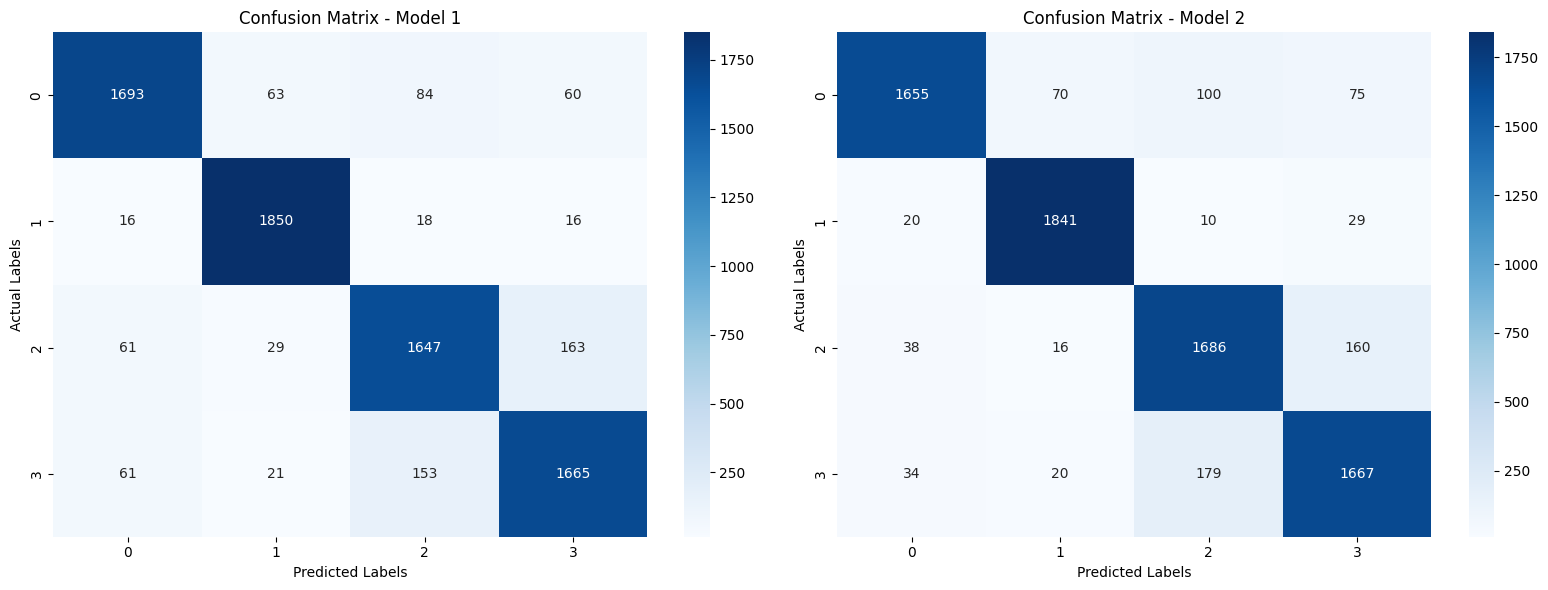

In [ ]:
# Create a figure with subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Confusion Matrix Heatmap for Model 1
conf_matrix_1 = confusion_matrix(y_test, model_1.predict(X_test_1).argmax(axis=1))
sns.heatmap(conf_matrix_1, annot=True, fmt="d", cmap="Blues", ax=ax[0])
ax[0].set_title("Confusion Matrix - Model 1")
ax[0].set_ylabel("Actual Labels")
ax[0].set_xlabel("Predicted Labels")

# Confusion Matrix Heatmap for Model 2
conf_matrix_2 = confusion_matrix(y_test, model_2.predict(X_test_2).argmax(axis=1))
sns.heatmap(conf_matrix_2, annot=True, fmt="d", cmap="Blues", ax=ax[1])
ax[1].set_title("Confusion Matrix - Model 2")
ax[1].set_ylabel("Actual Labels")
ax[1].set_xlabel("Predicted Labels")

# Display the subplots
plt.tight_layout()
plt.show()

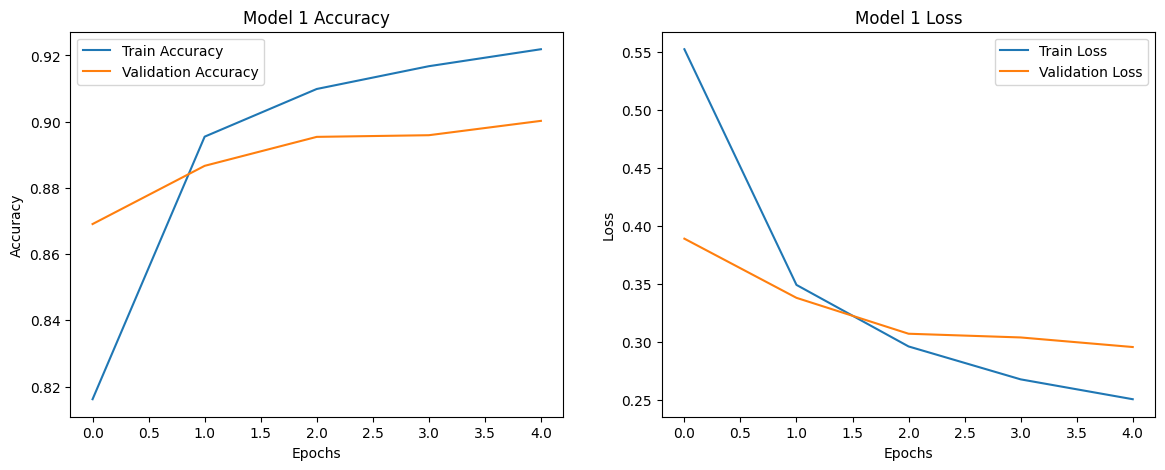

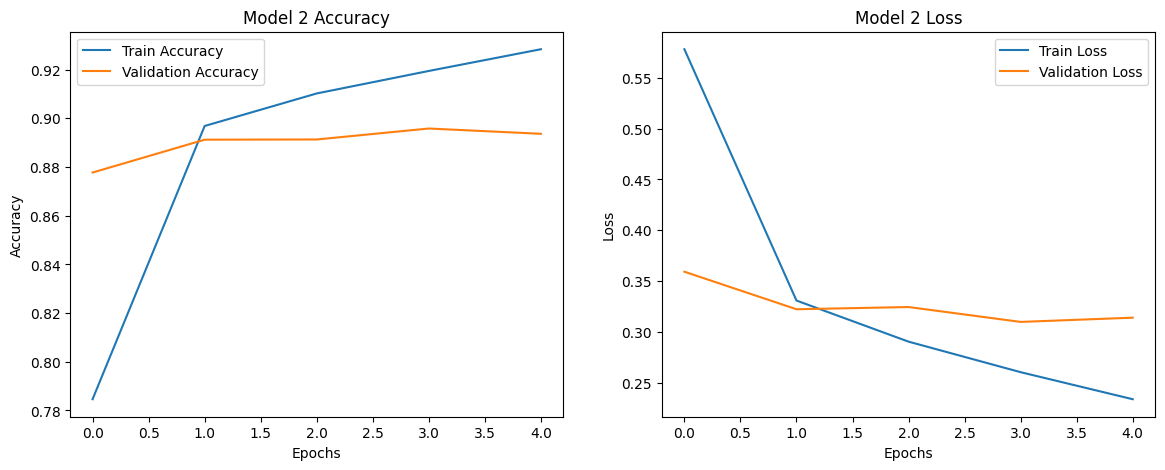

In [ ]:
# Accuracy and Loss Plots for Model 1
plt.figure(figsize=(14, 5))

# Plotting training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history_1.history["accuracy"], label="Train Accuracy")
plt.plot(history_1.history["val_accuracy"], label="Validation Accuracy")
plt.title("Model 1 Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Plotting training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_1.history["loss"], label="Train Loss")
plt.plot(history_1.history["val_loss"], label="Validation Loss")
plt.title("Model 1 Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

# Accuracy and Loss Plots for Model 2
plt.figure(figsize=(14, 5))

# Plotting training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history_2.history["accuracy"], label="Train Accuracy")
plt.plot(history_2.history["val_accuracy"], label="Validation Accuracy")
plt.title("Model 2 Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Plotting training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_2.history["loss"], label="Train Loss")
plt.plot(history_2.history["val_loss"], label="Validation Loss")
plt.title("Model 2 Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()